## 2.5 Advanced Geospatial Plotting

### Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
# Creating file path using os and uploading the dataset in chunks
# Creating path to import dataset
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python'

In [3]:
file_name = 'citibike_data.csv'

In [4]:
dataset_path = os.path.join(path, file_name)

In [5]:
# loading data in chunks
chunk_size = 100000  
chunks = pd.read_csv(dataset_path, chunksize=chunk_size, low_memory=False)

In [6]:
all_data = []

In [7]:
# Loop through each chunk and store it
for chunk in chunks:
    all_data.append(chunk)

In [8]:
# Concatenate them into one DataFrame
df = pd.concat(all_data, ignore_index=True)

### Data preprocessing

In [9]:
df.columns

Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'ride_duration', 'end_year',
       'end_month', 'end_day', 'end_weekday', 'end_hour', 'start_year',
       'start_month', 'start_day', 'start_weekday', 'start_hour'],
      dtype='object')

In [10]:
df.shape

(29768282, 26)

In [9]:
# Create a randomized sample dataset using 5% of full dataset for this analysis
df_sample = df.sample(frac=0.05, random_state=42)

In [12]:
df_sample

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_year,end_month,end_day,end_weekday,end_hour,start_year,start_month,start_day,start_weekday,start_hour
26912495,4337FD4D0A20576C,electric_bike,2022-11-23 08:40:22.577,2022-11-23 08:58:17.192,W 100 St & Manhattan Ave,7538.14,W 33 St & 10 Ave,6492.04,40.794934,-73.964464,...,2022,11,23,2,8,2022,11,23,2,8
2342555,FB88D9E61B43D316,classic_bike,2022-03-24 15:27:51.105,2022-03-24 15:45:51.560,Hanson Pl & Ashland Pl,4395.07,Pioneer St & Van Brunt St,4169.04,40.685068,-73.977908,...,2022,3,24,3,15,2022,3,24,3,15
27834596,5544DB17A0D093A9,classic_bike,2022-11-28 11:57:41.365,2022-11-28 12:10:47.169,E 67 St & Park Ave,6932.14,Grand Army Plaza & Central Park S,6839.1,40.767801,-73.965921,...,2022,11,28,0,12,2022,11,28,0,11
10598163,B925440B0A8006C0,electric_bike,2022-06-29 19:20:49.475,2022-06-29 19:27:44.569,Center Blvd & 51 Ave,6179.07,Vernon Blvd & 50 Ave,6170.02,40.743366,-73.959607,...,2022,6,29,2,19,2022,6,29,2,19
25332849,558134615D853AC6,classic_bike,2022-10-08 21:21:56.985,2022-10-08 21:33:24.605,Stewart Ave & Johnson Ave,5123.07,Scholes St & Manhattan Ave,5108.01,40.708690,-73.925870,...,2022,10,8,5,21,2022,10,8,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23011901,BB1585A25ACE7C8F,classic_bike,2022-10-28 17:59:37.992,2022-10-28 18:23:03.449,Bergen St & Smith St,4446.01,N 11 St & Kent Ave,5489.04,40.686744,-73.990632,...,2022,10,28,4,18,2022,10,28,4,17
1574070,F223ADAE633CD246,classic_bike,2022-02-11 17:18:33.734,2022-02-11 17:23:59.924,Henry St & Grand St,5294.04,Pike St & E Broadway,5270.05,40.714211,-73.981095,...,2022,2,11,4,17,2022,2,11,4,17
5245293,B3A48E470010FADA,electric_bike,2022-04-15 17:56:49.938,2022-04-15 18:28:51.438,5 Ave & E 87 St,7323.09,5 Ave & E 87 St,7323.09,40.782323,-73.959875,...,2022,4,15,4,18,2022,4,15,4,17
9200694,BCF463AAEB89F114,classic_bike,2022-06-19 21:24:50.076,2022-06-19 21:36:45.894,6 Ave & Canal St,5500.07,Washington Pl & 6 Ave,5838.09,40.722438,-74.005664,...,2022,6,19,6,21,2022,6,19,6,21


In [11]:
df_sample.to_csv('sampleset_citibike.csv')

In [11]:
# Create a value column and group by start and end station 
df_sample['value'] = 1
df_group = df_sample.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [14]:
df_group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,38
1,1 Ave & E 110 St,1 Ave & E 30 St,1
2,1 Ave & E 110 St,1 Ave & E 78 St,3
3,1 Ave & E 110 St,1 Ave & E 94 St,5
4,1 Ave & E 110 St,10 Ave & W 215 St,1
...,...,...,...
351642,Yankee Ferry Terminal,Pioneer St & Van Brunt St,1
351643,Yankee Ferry Terminal,Soissons Landing,218
351644,Yankee Ferry Terminal,South St & Whitehall St,4
351645,Yankee Ferry Terminal,West St & Chambers St,1


In [16]:
print(df_group['value'].sum())
print(df_sample.shape)

1488414
(1488414, 27)


In [17]:
df_group['value'].describe()

count    351647.000000
mean          4.232694
std           7.937012
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         633.000000
Name: value, dtype: float64

In [12]:
df_group.rename(columns = {'value': 'trips'}, inplace = True)

### Exploratory analysis into trips

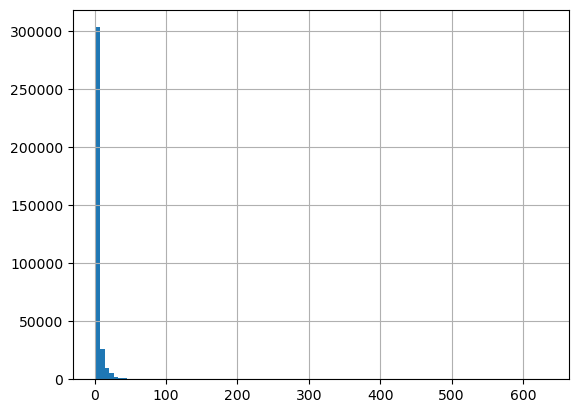

In [19]:
df_group['trips'].hist(bins = 100)
plt.show()

The highest bin being shown at 0-1 shows that the data set is mostly comprised of stations that do not have trips between them. There are a lot of station pairs that customers do not travel back and forth to. There are fewer station pairs that customers frequently travel back and forth to, perhaps due to location, which we will explore.

[]

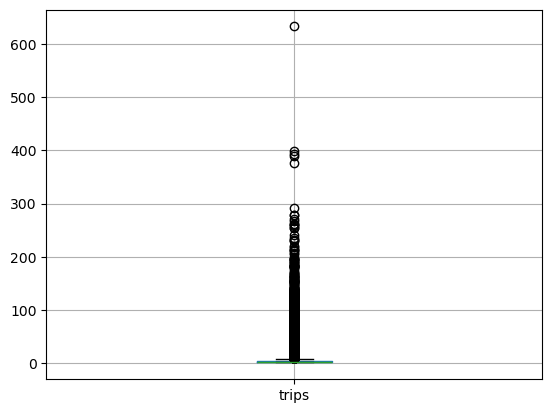

In [20]:
b_plot = df_group.boxplot(column = 'trips') 
b_plot.plot()

The boxplot further empasizes what the histogram portrayed, that there a large amount of station pairs that are not travelled to and from. However, the boxplot seems to show that there are some station pairs that have a high number of trip instances.

In [21]:
df_group['trips'].sort_index().value_counts()

trips
1      158792
2       58424
3       31696
4       20540
5       14631
        ...  
240         1
158         1
232         1
142         1
218         1
Name: count, Length: 204, dtype: int64

In [13]:
df_group.to_csv('df_groupby_trips.csv')

In [12]:
df_group = pd.read_csv('df_groupby_trips.csv')

### Merging latitude and longitude from original sample set to the new aggregated data set

In [13]:
# Extract unique coordinates for start station
start_station_coords = df_sample[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates(subset=['start_station_name'])

In [14]:
# Extract unique coordinates for end station
end_station_coords = df_sample[['end_station_name', 'end_lat', 'end_lng']].drop_duplicates(subset=['end_station_name'])

In [15]:
# Merge the start station coordinates into df_group
df_group = pd.merge(df_group, start_station_coords, on='start_station_name', how='left')

In [16]:
# Merge the end station coordinates into df_group
df_group = pd.merge(df_group, end_station_coords, on='end_station_name', how='left')

In [17]:
df_group.shape

(351647, 8)

In [19]:
df_group.head()

,Unnamed: 0,start_station_name,end_station_name,trips,start_lat,start_lng,end_lat,end_lng
0,0,1 Ave & E 110 St,1 Ave & E 110 St,38,40.792327,-73.9383,40.792327,-73.938300
1,1,1 Ave & E 110 St,1 Ave & E 30 St,1,40.792327,-73.9383,40.741444,-73.975361
2,2,1 Ave & E 110 St,1 Ave & E 78 St,3,40.792327,-73.9383,40.771404,-73.953517
3,3,1 Ave & E 110 St,1 Ave & E 94 St,5,40.792327,-73.9383,40.781721,-73.945940
4,4,1 Ave & E 110 St,10 Ave & W 215 St,1,40.792327,-73.9383,40.869325,-73.915198


In [20]:
# Drop the Unnamed column from the DataFrame
df_group = df_group.drop(columns=['Unnamed: 0'])

In [21]:
# Rename columns for better clarity
df_group.rename(columns={
    'start_station_name': 'start_station',
    'end_station_name': 'end_station',
    'trips': 'trip_count',
    'start_lat': 'start_latitude',
    'start_lng': 'start_longitude',
    'end_lat': 'end_latitude',
    'end_lng': 'end_longitude'
}, inplace=True)

In [22]:
import gc # this is garbage collector - speeds up performance
gc.collect()

0

In [23]:
df_group.head()

,start_station,end_station,trip_count,start_latitude,start_longitude,end_latitude,end_longitude
0,1 Ave & E 110 St,1 Ave & E 110 St,38,40.792327,-73.9383,40.792327,-73.938300
1,1 Ave & E 110 St,1 Ave & E 30 St,1,40.792327,-73.9383,40.741444,-73.975361
2,1 Ave & E 110 St,1 Ave & E 78 St,3,40.792327,-73.9383,40.771404,-73.953517
3,1 Ave & E 110 St,1 Ave & E 94 St,5,40.792327,-73.9383,40.781721,-73.945940
4,1 Ave & E 110 St,10 Ave & W 215 St,1,40.792327,-73.9383,40.869325,-73.915198


In [24]:
df_group.to_csv('final_trips_count.csv')

### Plot the map

In [20]:
df_final = pd.read_csv('final_trips_count.csv')

In [3]:
df_final.head()

,Unnamed: 0,start_station,end_station,trip_count,start_latitude,start_longitude,end_latitude,end_longitude
0,0,1 Ave & E 110 St,1 Ave & E 110 St,38,40.792327,-73.9383,40.792327,-73.938300
1,1,1 Ave & E 110 St,1 Ave & E 30 St,1,40.792327,-73.9383,40.741444,-73.975361
2,2,1 Ave & E 110 St,1 Ave & E 78 St,3,40.792327,-73.9383,40.771404,-73.953517
3,3,1 Ave & E 110 St,1 Ave & E 94 St,5,40.792327,-73.9383,40.781721,-73.945940
4,4,1 Ave & E 110 St,10 Ave & W 215 St,1,40.792327,-73.9383,40.869325,-73.915198


In [21]:
# Drop the 'Unnamed: 0' column
df_final = df_final.drop(columns=['Unnamed: 0'])

In [37]:
# Initialize the KeplerGl map with your data
m = KeplerGl(height=700, data={"data_1": df_final})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [23]:
m

KeplerGl(data={'data_1':                 start_station                end_station  trip_count  \
0            …

##### Map Settings:
I chose green to show the starting stations and red to show the end stations, because it makes sense to portray green for start and red for stop, like traffic lights. I picked contrasting colors for the arcs as well as off-green and off-red, which I found to be aestheically pleasing. 
##### Common trips filter:
The most common trips for 2022 occurred at the Central Park S & 6 Ave station, as it had 633 trips where customers started and ended at the same station. In this general area, most trips occurred between the same stations, the other stations being Grand Army Plaza & Central Park S, 7 Ave & Central Park South, and Broadway & W 58 St. The West Drive & Prospect Park West is one station that has a lot of common trips below downtown Brooklyn, mostly trips that start and end at the same station. 
##### Without the filter:
I notice there are a lot of longer trips occurring between the Brooklyn and Queens area, so it may be a good idea to utilize adding more stations between these areas.

In [38]:
config = m.config

In [31]:
print(config)

{'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'm5q569m', 'type': 'point', 'config': {'dataId': 'data_1', 'label': 'start', 'color': [231, 159, 213], 'highlightColor': [252, 242, 26, 255], 'columns': {'lat': 'start_latitude', 'lng': 'start_longitude'}, 'isVisible': True, 'visConfig': {'radius': 10, 'fixedRadius': False, 'opacity': 0.8, 'outline': False, 'thickness': 2, 'strokeColor': None, 'colorRange': {'name': 'Global Warming', 'type': 'sequential', 'category': 'Uber', 'colors': ['#5A1846', '#900C3F', '#C70039', '#E3611C', '#F1920E', '#FFC300']}, 'strokeColorRange': {'name': 'Global Warming', 'type': 'sequential', 'category': 'Uber', 'colors': ['#5A1846', '#900C3F', '#C70039', '#E3611C', '#F1920E', '#FFC300']}, 'radiusRange': [0, 50], 'filled': True}, 'hidden': False, 'textLabel': [{'field': None, 'color': [255, 255, 255], 'size': 18, 'offset': [0, 0], 'anchor': 'start', 'alignment': 'center', 'outlineWidth': 0, 'outlineColor': [255, 0, 0, 255], 'backgroun

In [39]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [40]:
m.save_to_html(file_name = 'NewYorkCitiBikeTripData.html', read_only = False, config = config)

Map saved to NewYorkCitiBikeTripData.html!
